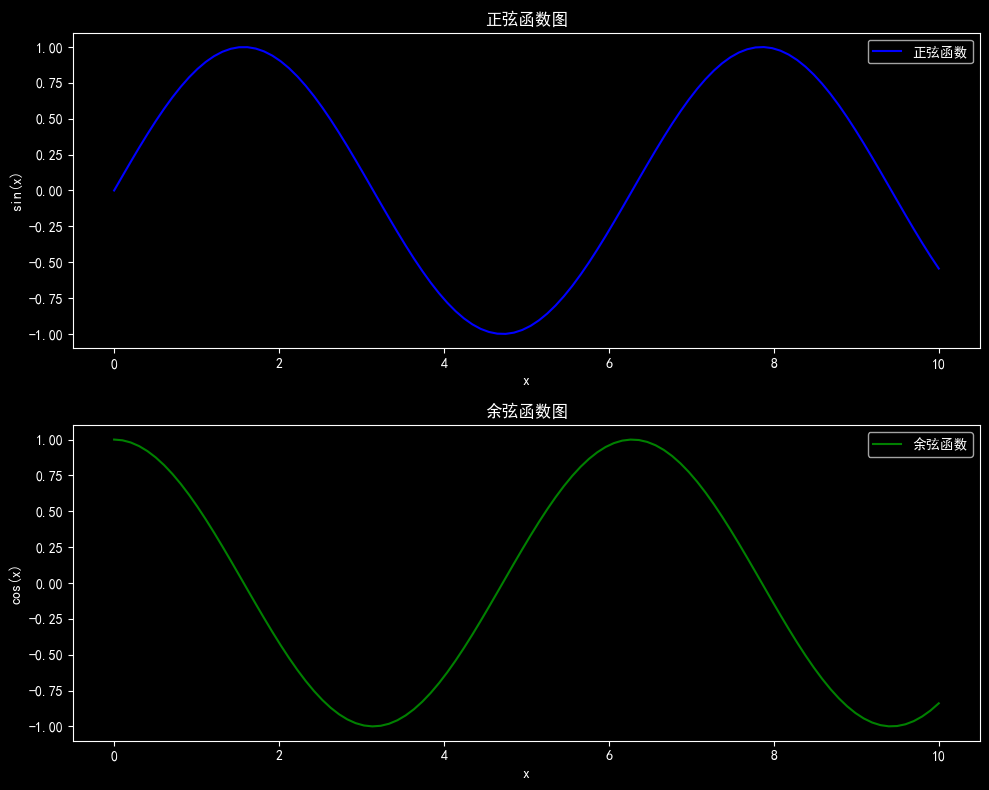

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# 生成一些示例数据
x = np.linspace(0, 10, 100)
y1 = np.sin(x)
y2 = np.cos(x)

# 创建 2x1 的子图
fig, axes = plt.subplots(2, 1, figsize=(10, 8))

# 第一个子图
axes[0].plot(x, y1, label='正弦函数', color='blue')  # 汉字标签
axes[0].set_title('正弦函数图')
axes[0].set_xlabel('x')
axes[0].set_ylabel('sin(x)')
axes[0].legend()  # 显示图例

# 第二个子图
axes[1].plot(x, y2, label='余弦函数', color='green')  # 汉字标签
axes[1].set_title('余弦函数图')
axes[1].set_xlabel('x')
axes[1].set_ylabel('cos(x)')
axes[1].legend()  # 显示图例

# 调整布局
plt.tight_layout()

# 显示图形
plt.show()


C:\Users\lcr\AppData\Local\Temp\ipykernel_4728\1043336910.py:54: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


IndexError: index 16 is out of bounds for axis 0 with size 16

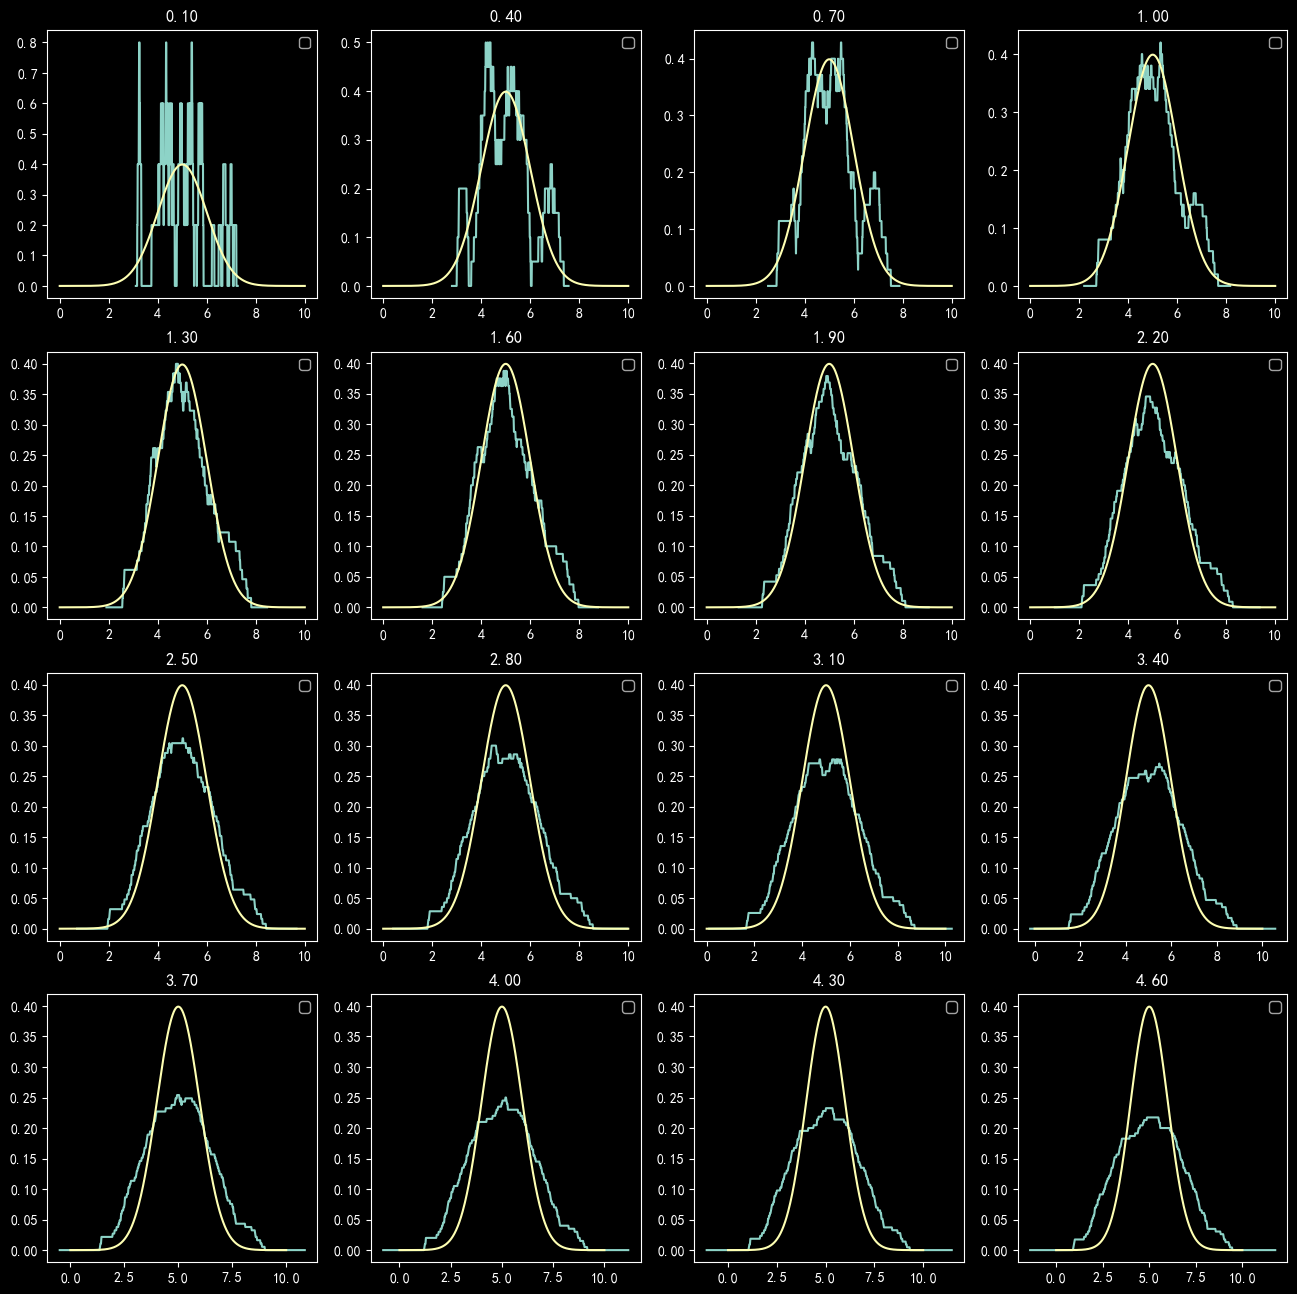

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.stats import norm
# 创建一些 1D 数据

data = [4.6019,5.2564,5.2200,3.2886,3.7942, 
		3.2271,4.9275,3.2789,5.7019,3.9945, 
		3.8936,6.7906,7.1624,4.1807,4.9630, 
		6.9630,4.4597,6.7175,5.8198,5.0555, 
		4.6469,6.6931,5.7111,4.3672,5.3927, 
		4.1220,5.1489,6.5319,5.5318,4.2403, 
		5.3480,4.3022,7.0193,3.2063,4.3405, 
		5.7715,4.1797,5.0179,5.6545,6.2577, 
		4.0729,4.8301,4.5283,4.8858,5.3695, 
		4.3814,5.8001,5.4267,4.5277,5.2760]
# data = [1, 3]
# 设置字体，确保能显示汉字
plt.rcParams['font.family'] = 'SimHei'  # 黑体，或使用其他支持中文的字体
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

def f1(x, width):
	val = []
	for i, x_value in enumerate(x):
		value = .0
		for j, t in enumerate(data):
			if(math.fabs(x_value-t)/width <= 0.5):
				value += 1 / width
		val.append(value/len(data))
	return val
# 设置不同的窗宽
be,en, sp =0.1, 5, 0.3
window_widths = np.arange(be,en, sp)
TTT_x = np.linspace(0,10, 500)
TTT_y = norm.pdf(np.linspace(0,10, 500), 5, 1)
# = {0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 1, 1.5, 3}
# for i in range(10, 0, -0.1):
	# window_widths.add(i)
# 设置九宫格布局
fig, axes = plt.subplots(4, 4, figsize=(4*4, 4*4))
axes = axes.flatten()
# 绘制不同窗宽下的方窗估计图
for i, width in enumerate(window_widths):
	ax = axes[i]
	if width == 0:
		continue
	# 定义 bins (根据窗宽调整 bin 数)
	x = np.linspace(min(data)-width, max(data) + width, 500)
	# 绘制结果
	ax.plot(x, f1(x, width=width))
	ax.plot(TTT_x, TTT_y)
	ax.set_title(f'{width:.2f}')
	# ax.grid(True)
	ax.legend()

# 调整布局
plt.tight_layout()
plt.show()

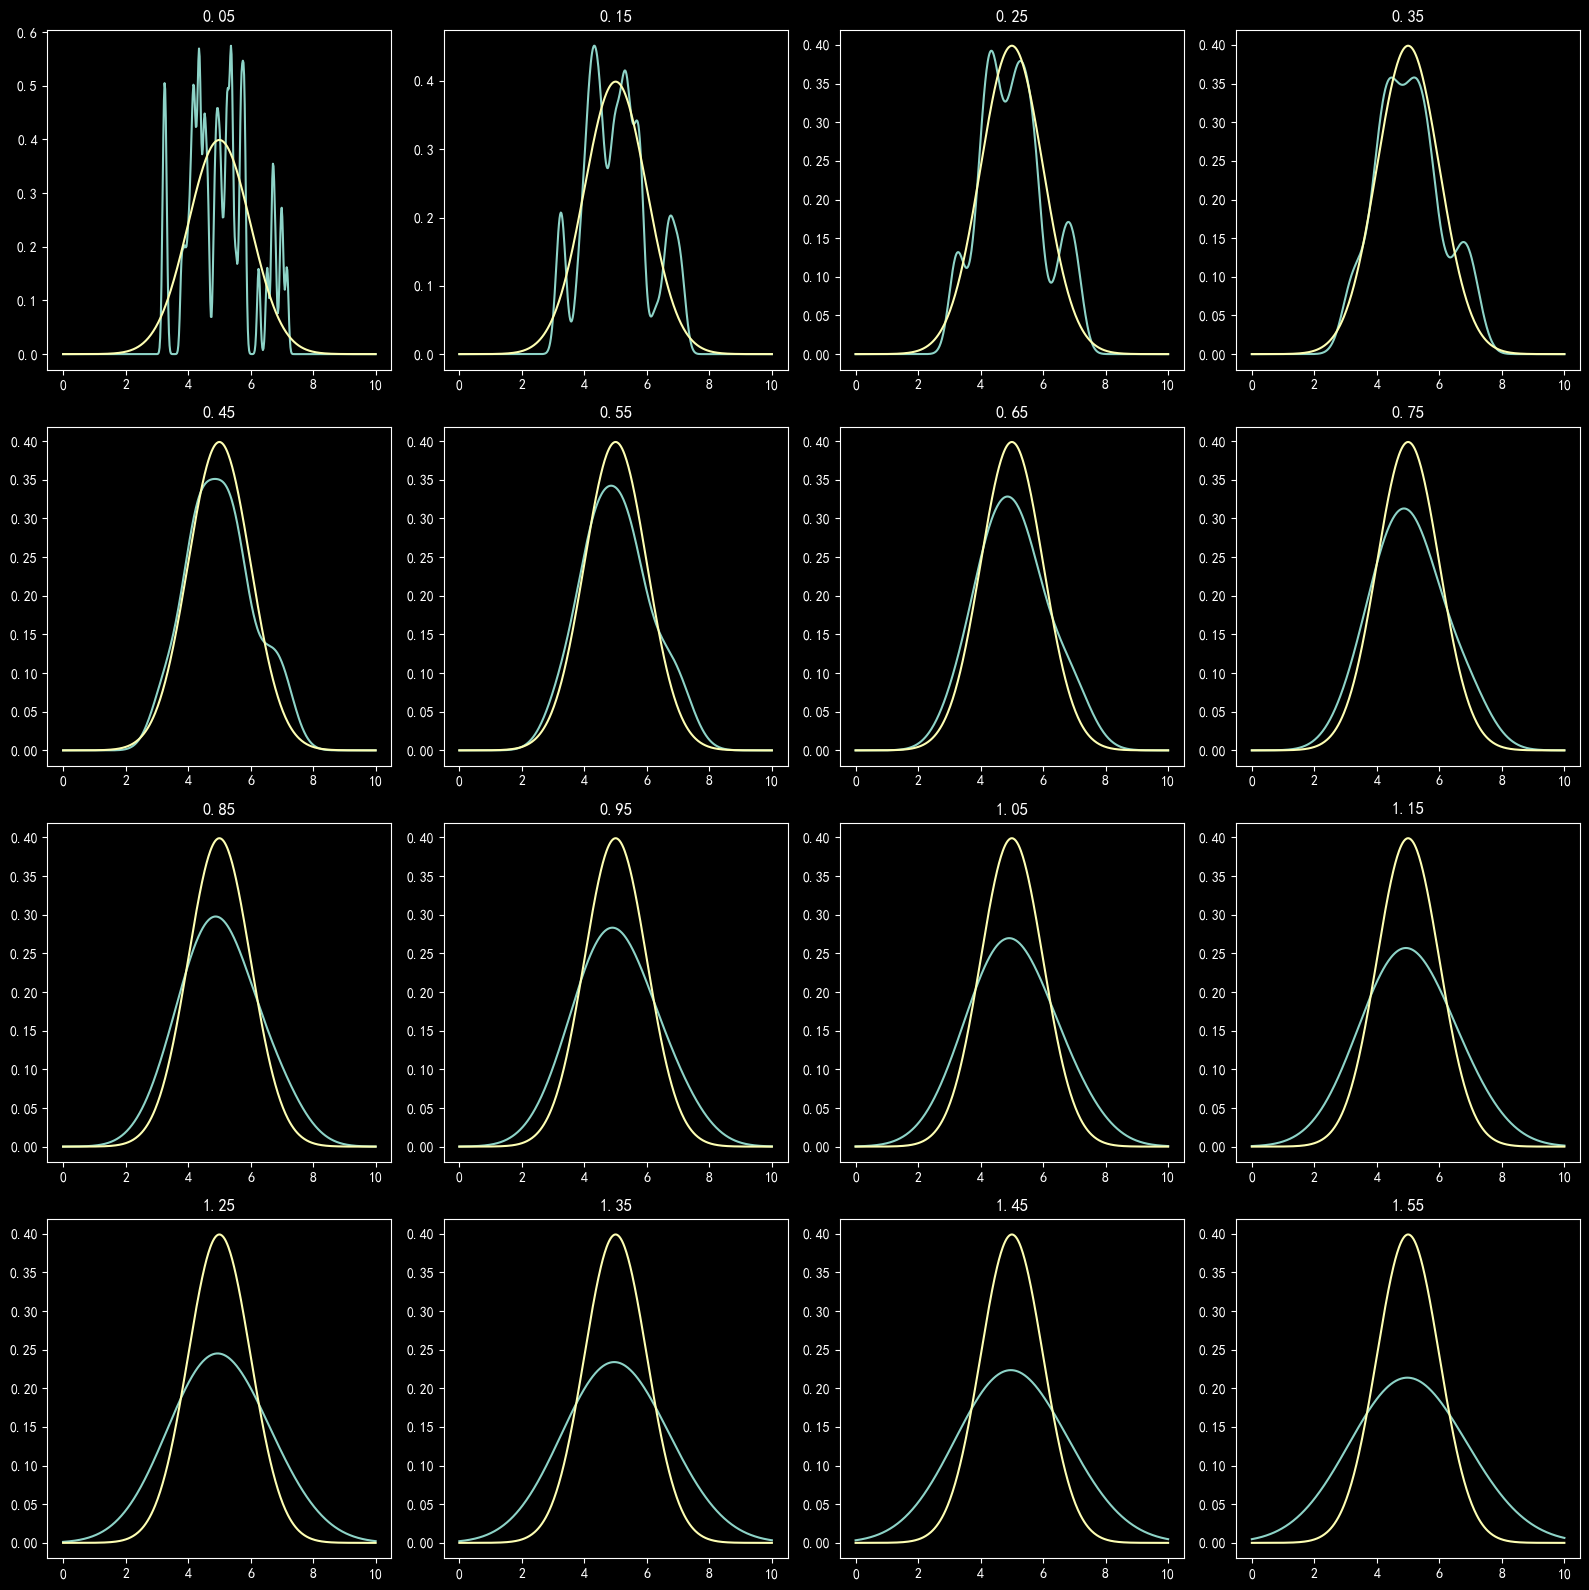

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.stats import norm

# 创建一些 1D 数据

data = [4.6019,5.2564,5.2200,3.2886,3.7942, 
		3.2271,4.9275,3.2789,5.7019,3.9945, 
		3.8936,6.7906,7.1624,4.1807,4.9630, 
		6.9630,4.4597,6.7175,5.8198,5.0555, 
		4.6469,6.6931,5.7111,4.3672,5.3927, 
		4.1220,5.1489,6.5319,5.5318,4.2403, 
		5.3480,4.3022,7.0193,3.2063,4.3405, 
		5.7715,4.1797,5.0179,5.6545,6.2577, 
		4.0729,4.8301,4.5283,4.8858,5.3695, 
		4.3814,5.8001,5.4267,4.5277,5.2760]
# data = [1, 3]

def f2(x, width):
	val = []
	for i, x_value in enumerate(x):
		# A = np.full(len(data), x_value)
		# B = np.full(len(data), width)
		# D = norm.pdf(A, data, B)
		# C = np.sum(norm.pdf(A, data, B))
		EE = np.sum(norm.pdf(np.full(len(data), x_value), data, np.full(len(data), width)))
		val.append(EE/len(data))
	return val
# 设置不同的窗宽
be,en, sp =0.05, 1.65, 0.1
window_widths = np.arange(be,en, sp)
# = {0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 1, 1.5, 3}
# for i in range(10, 0, -0.1):
	# window_widths.add(i)
# 设置九宫格布局
# fig, axes = plt.subplots(int(en-be), int(1/sp), figsize=(int(1/sp)*8, int(en-be)*8))
fig, axes = plt.subplots(4,4, figsize=(4*4, 4*4))

axes = axes.flatten()

TTT_x = np.linspace(0,10, 500)
TTT_y = norm.pdf(np.linspace(0,10, 500), 5, 1)
# 绘制不同窗宽下的方窗估计图
for i, width in enumerate(window_widths):
	ax = axes[i]
	if width == 0:
		continue
	# 定义 bins (根据窗宽调整 bin 数)
	x = np.linspace(0,10, 500)
	# 绘制结果
	ax.plot(x, f2(x, width=width))
	ax.plot(TTT_x, TTT_y)
	ax.set_title(f'{width:.2f}')

# 调整布局
plt.tight_layout()
plt.show()



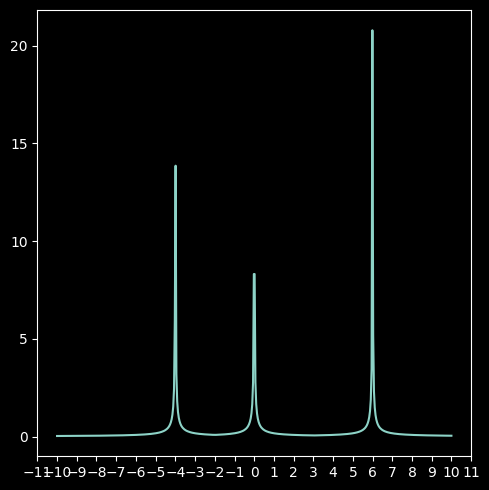

In [13]:
# %%
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.stats import norm
from matplotlib.pyplot import MultipleLocator

# 创建一些 1D 数据

data = [-4, 0, 6]
# data = [1, 3]

def f2(x):
	val = []
	for i, x_value in enumerate(x):
		mi = 10
		for j, y in enumerate(data):
			mi = min(mi, np.fabs(x_value-y))
		val.append(1/(2*mi*len(data)))
	return val

plt.figure(figsize=(5,5))
plt.gca().xaxis.set_major_locator(MultipleLocator(1))
x = np.linspace(-10,10, 500)
# 绘制结果
plt.plot(x, f2(x), label="高斯窗估计")
# 调整布局
plt.tight_layout()
plt.show()

